## Model evaluation

### Step 1 : Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


### Step 2 :  Loading Trained Model and Test Data

In [7]:
#import joblib

# Load the trained model
model = joblib.load("../trained_model.pkl") 

print("✅ Model loaded successfully!")

# Load test dataset
X_test = pd.read_csv(r"C:\Users\hp\OMDENA\machine-learning-linear-regression-1962vickyrena\X_test.csv")
y_test = pd.read_csv(r"C:\Users\hp\OMDENA\machine-learning-linear-regression-1962vickyrena\y_test.csv")

# Ensure target variable is 1D
y_test = y_test.values.ravel()


print(f"✅ Data Loaded: Test shape: {X_test.shape}")


✅ Model loaded successfully!
✅ Data Loaded: Test shape: (102, 10)


In [8]:
# Make predictions
y_pred = model.predict(X_test)


### Step 3 :Evaluate Model Performance


In [18]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print(" Model Performance Metrics:")
print(" Mean Absolute Error (MAE): {mae:.2f}")
print(" Mean Squared Error (MSE): {mse:.2f}")
print(" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(" R² Score: {r2:.2f}")


 Model Performance Metrics:
 Mean Absolute Error (MAE): {mae:.2f}
 Mean Squared Error (MSE): {mse:.2f}
 Root Mean Squared Error (RMSE): {rmse:.2f}
 R² Score: {r2:.2f}


### Step 4: Plot residuals to check the assumptions of linear regression.

In [19]:
# Ensure y_test is a 1D array/Series
y_test_values = y_test.values.flatten() if hasattr(y_test, 'values') else y_test.flatten()
y_pred_values = y_pred.flatten()

print(f"y_test shape: {y_test_values.shape}")
print(f"y_pred shape: {y_pred_values.shape}")

y_test shape: (102,)
y_pred shape: (102,)


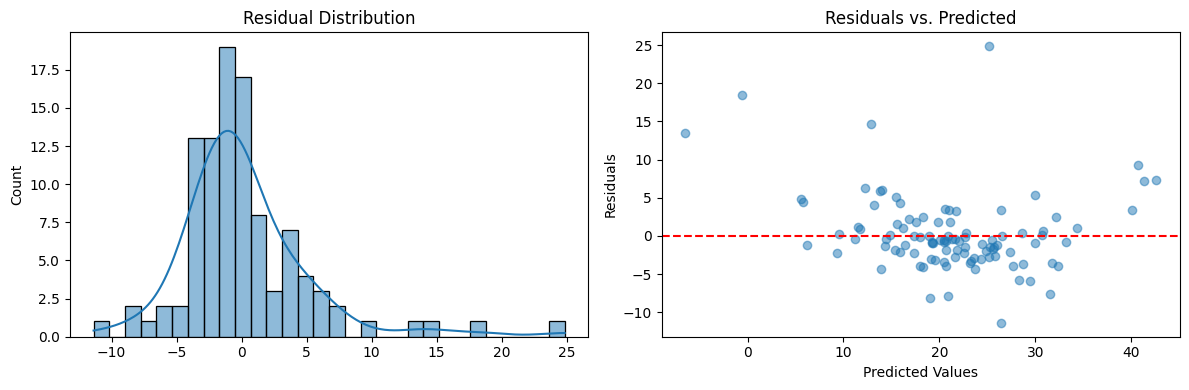

In [20]:
#Calculate residuals
residuals = y_test_values - y_pred_values

# Plot distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residual Distribution')

# Plot residuals vs predicted
plt.subplot(1, 2, 2)
plt.scatter(y_pred_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

### Step  05: Compare model performance with different feature sets or preprocessing steps.

In [26]:
X_train = pd.read_csv(r"C:\Users\hp\OMDENA\machine-learning-linear-regression-1962vickyrena\X_train.csv")
X_test = pd.read_csv(r"C:\Users\hp\OMDENA\machine-learning-linear-regression-1962vickyrena\X_test.csv")
y_train = pd.read_csv(r"C:\Users\hp\OMDENA\machine-learning-linear-regression-1962vickyrena\y_train.csv")
y_test = pd.read_csv(r"C:\Users\hp\OMDENA\machine-learning-linear-regression-1962vickyrena\y_test.csv")

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

LinearRegression()

In [32]:
def compare_models(feature_sets):
    results = {}
    for name, features in feature_sets.items():
        model = LinearRegression().fit(X_train[features], y_train)
        y_pred = model.predict(X_test[features])
        results[name] = {
            'Features': ', '.join(features) if len(features) < 10 else f'{len(features)} features',
                'RMSE': np.sqrt(mean_squared_error(y_test_values, y_pred)),
                'MAE': mean_absolute_error(y_test_values, y_pred),
                'R²': r2_score(y_test_values, y_pred)
        }
    return pd.DataFrame(results).T

# Example usage:
feature_sets = {
    'Top 3': ['lstat', 'rm', 'ptratio'],
    'Top 5': ['lstat', 'rm', 'ptratio', 'dis', 'tax'],
    'All Features': X_train.columns
}
compare_models(feature_sets)

,Features,RMSE,MAE,R²
Top 3,"lstat, rm, ptratio",5.207202,3.332538,0.630253
Top 5,"lstat, rm, ptratio, dis, tax",5.199752,3.27935,0.63131
All Features,10 features,5.009353,3.249907,0.657816
